<a href="https://colab.research.google.com/github/johnnycleiton07/llm-studies/blob/main/Implementa%C3%A7%C3%A3o_de_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criação de Rede Neural para PLN

Redes neurais artificiais são eficazes para tarefas de PLN, como a classificação de textos. Este tutorial aborda a construção de uma rede neural para classificar mensagens de spam, utilizando vetorização de texto e as bibliotecas Keras e scikit-learn. O processo inclui preparação de dados, definição da arquitetura da rede, treinamento e avaliação do modelo, demonstrando como redes neurais podem automatizar a distinção entre spam e mensagens legítimas.

##Importação de bibliotecas e upload do dataset

Nesta etapa, são importadas todas as bibliotecas necessárias para o projeto, como pandas, numpy, e ferramentas específicas do sklearn e Keras. Também é feito o upload do dataset "spam.csv" para o ambiente de trabalho.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
#importando o arquivo csv
from google.colab import files
files.upload()

In [ ]:
#visualizando o dataset
spam = pd.read_csv("spam.csv")
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


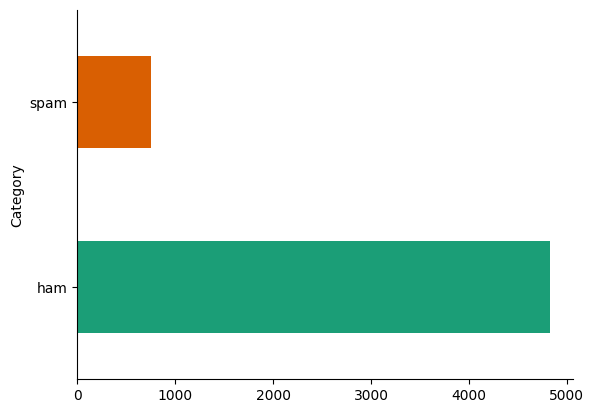

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
spam.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Pré-processamento dos dados

As categorias de texto foram transformadas em números utilizando `LabelEncoder()` para que os algoritmos de machine learning possam processá-las corretamente. `fit_transform` faz a transformação dos dados para que as máquinas consigam ler e interpretar

In [ ]:
#transformar as categorias em número para que as máquinas entendam

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(spam['Category'])
print(y)

[0 0 1 ... 0 0 0]


##Divisão em conjunto de treino e teste

O dataset foi dividido em conjuntos de **treino** e **teste** usando `train_test_split()` do scikit-learn. `X_train` e `X_test` são as partes dos dados de entrada para treinamento e teste, respectivamente. Já `y_train` e `y_test` são as partes das classes (spam ou não spam) para treinamento e teste, respectivamente.

* `test_size=0.3` indica que 30% dos dados serão usados para teste e 70% para treinamento.

Essa divisão em treino e teste é essencial para avaliar a performance do modelo em dados não vistos durante o treinamento.

In [ ]:
mensagens = spam['Message'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)
print(X_train)

["I'm not driving... Raining! Then i'll get caught at e mrt station lor."
 'Hope you are not scared!'
 'Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123'
 ... 'No but the bluray player can'
 'Waiting in e car 4 my mum lor. U leh? Reach home already?'
 'So what do you guys do.']


##Vetorização das mensagens de texto

Para que o modelo de machine learning possa processar o texto, as mensagens são vetorizadas usando `CountVectorizer()`, transformando cada mensagem em uma matriz de contagem de palavras.

In [ ]:
#Vetorizando as mensagens em 0s ou 1s indicando uma matriz de contagem de palavras, cada linha é uma mensagem
vetorizador = CountVectorizer()
vetorizador.fit(X_train)

X_train = vetorizador.transform(X_train)
X_test = vetorizador.transform(X_test)
print(X_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Visualizando melhor a matriz vetorizada com todo o conteúdo
np.set_printoptions(threshold=np.inf)
X_train.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#descobrindo a quantidade de linhas
print(X_train.shape[0])

3900


In [ ]:
#descobrindo a quantidade de features (características/palavras únicas encontradas no conjunto de dados)
print(X_train.shape[1])

7116




---


##Construção do modelo de Rede Neural

Aqui, é definida a arquitetura da rede neural utilizando o Keras. São adicionadas camadas densas com ativação ReLU e uma camada de saída com ativação sigmoid para classificação binária.

* No código é criada uma camada no estilo de empilhamento em sequência (`Sequential`), uma camada densa (`Dense`), o número de neurônios na camada (`units`), a função de ativação (`activation="relu"`).

* No primeiro neurônio é informada a camada de entrada (`input_dim`) onde é necessário passar a dimensão do vetor criado anteriormente no processo de vetorização.

* As camadas de `Dropout` servem para evitar o overfiting.

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=10, activation="relu", input_dim=X_train.shape[1])) #primeira camada de neurônios
modelo.add(Dropout(0.1))
modelo.add(Dense(units=8, activation="relu"))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1, activation="sigmoid"))

###Compilação e treinamento do modelo

O modelo é compilado com função de perda `"mean_squared_error"`, otimizador `"adam"` e métrica de `"accuracy"`. Depois, é treinado com os dados de treino, validando com os dados de teste.

In [ ]:
#compilando o modelo, ou seja, preparando o modelo para o treinamento, configurando aspectos essenciais
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                71170     
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 71267 (278.39 KB)
Trainable params: 71267 (278.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#chamando o método fit para realizar o treinamento
modelo.fit(X_train, y_train, epochs=20, batch_size=10, verbose=True, validation_data=(X_test, y_test))

Epoch 1/20
390/390 [==============================] - 2s 3ms/step - loss: 0.0829 - accuracy: 0.9182 - val_loss: 0.0225 - val_accuracy: 0.9797
Epoch 2/20
390/390 [==============================] - 2s 5ms/step - loss: 0.0156 - accuracy: 0.9821 - val_loss: 0.0131 - val_accuracy: 0.9856
Epoch 3/20
390/390 [==============================] - 2s 5ms/step - loss: 0.0071 - accuracy: 0.9933 - val_loss: 0.0117 - val_accuracy: 0.9868
Epoch 4/20
390/390 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.9959 - val_loss: 0.0124 - val_accuracy: 0.9844
Epoch 5/20
390/390 [==============================] - 2s 4ms/step - loss: 0.0031 - accuracy: 0.9962 - val_loss: 0.0110 - val_accuracy: 0.9886
Epoch 6/20
390/390 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9972 - val_loss: 0.0111 - val_accuracy: 0.9886
Epoch 7/20
390/390 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.9982 - val_loss: 0.0116 - val_accuracy: 0.9874
Epoch 

###Avaliação do modelo

Após o treinamento, é possível avaliar o modelo usando os dados de teste e calcular a perda e acurácia alcançada.

* Perda (`loss`): mede o quão bem o modelo está se saindo durante o treinamento, comparando suas previsões com os valores reais. Quanto menor a perda, melhor o modelo está performando.

* Acurácia (`accuracy`): mede a proporção de previsões corretas feitas pelo modelo. Quanto maior a acurácia, mais preciso é o modelo em suas previsões.

In [ ]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

53/53 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9844
Loss:  0.013596014119684696
Acurácia:  0.9844497442245483


O modelo treinado foi utilizado para fazer previsões com os dados de teste.

In [ ]:
nova_previsao = modelo.predict(X_test)
print(nova_previsao) #o valor é retornado em números dentro de 0 e 1

53/53 [==============================] - 0s 2ms/step
[[4.14774567e-02]
 [3.12430598e-06]
 [9.99999940e-01]
 [3.74779574e-06]
 [4.64426057e-06]
 [7.01796089e-05]
 [1.34503307e-06]
 [5.08156063e-06]
 [4.05954634e-05]
 [9.99978423e-01]
 [4.12162881e-05]
 [8.75907426e-04]
 [3.34801152e-05]
 [5.65192113e-06]
 [0.00000000e+00]
 [4.57824899e-06]
 [2.09093487e-05]
 [1.88061531e-05]
 [2.47227465e-04]
 [3.41836218e-04]
 [1.57330924e-05]
 [5.21609564e-14]
 [2.81917371e-11]
 [5.83654110e-05]
 [3.42108109e-07]
 [1.36700669e-06]
 [2.57490501e-05]
 [0.00000000e+00]
 [5.20497068e-08]
 [1.81658703e-04]
 [2.77687795e-05]
 [1.23727439e-09]
 [1.88061531e-05]
 [2.07949070e-05]
 [7.12895649e-04]
 [9.99946117e-01]
 [3.29881300e-09]
 [7.14664161e-11]
 [9.96916115e-01]
 [2.40944274e-07]
 [9.99896169e-01]
 [9.99983013e-01]
 [9.09561524e-04]
 [6.90057583e-04]
 [2.78111023e-04]
 [1.85531972e-03]
 [6.66197184e-06]
 [7.82022056e-08]
 [9.99998629e-01]
 [9.99946654e-01]
 [2.88510549e-10]
 [1.69720384e-04]
 [1.1814426

In [ ]:
#melhorando a visualização do treinamento com True ou False

prev = (nova_previsao > 0.5)
print(prev)

[[False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 

Matriz de Confusão: é uma tabela que mostra a performance do modelo ao comparar as previsões feitas com os rótulos reais.


* TN (True Negative): E-mails corretamente classificados como não spam.
* FP (False Positive): E-mails erroneamente classificados como spam.
* FN (False Negative): E-mails erroneamente classificados como não spam.
* TP (True Positive): E-mails corretamente classificados como spam.

|     | Não Spam | Spam   |
|-----|----------|--------|
| Não Spam | TN     | FP   |
| Spam   | FN     | TP     |

In [ ]:
#gerando Matriz de Confusão
cm = confusion_matrix(y_test, prev)
print(cm)

[[1437    3]
 [  23  209]]
